# Detecting Pneumonia from X-Ray Images Using a Convolutional Neural Network

###### Authors:
[Rachel Edwards](mailto:rachelke411@gmail.com),
[Svitlana Glibova](mailto:s.glibova@gmail.com),
[Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

![patient](img/childhospital.jpg)


## Business Understanding

#### According to the [American Thoracic Society](https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf) and the [American Lung Association](https://www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/resource-library/lung-cancer-fact-sheet?referrer=https://www.google.com/):

> Pneumonia is the world’s leading cause of death among **children under 5** years of age.
********
> Pneumonia killed approximately **2,400 children a day** in 2015. 
********
> Pneumonia killed an estimated **880,000 children under the age of five** in 2016.
********
> More than **150,000 people** are estimated to die from **lung cancer** each year. 
********
> Infections, including pneumonia, are the **second most common cause of death in people with lung cancer**.
********


#### From a recent study by the Association of American Medical Colleges ([AAMC](https://www.aamc.org/news-insights/us-physician-shortage-growing)):

> “The **physician workforce shortages** that our nation is facing are being felt even more acutely as we mobilize on the front lines to combat the COVID-19 national emergency.” --David J. Skorton, MD, *AAMC president and CEO*
********
> The demographic that is going to suffer most from this shortage is **patients over age 65**: "While the national population is projected to grow by 10.4% during the 15 years covered by the study, *the over-65 population is expected to grow by 45.1%*."

********

#### Pneumonia: A Quick Review

[Pneumonia](https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204) is an inflammation of the air sacs of the lungs. Various bacteria, viruses, and fungi can cause this disease. The inflammation causes the lungs to be filled with infiltrates (pus/fluids) which reduces the lungs' ability to get oxygen to the body. Pneumonia can lead to bacteremia (can cause septic shock and organ failure), trouble breathing, fluid buildup, and lung abscess. 

**Formal Diagnosis** is done with a [chest x-ray](https://www.glowm.com/atlas-page/atlasid/chestXray.html#Pneumonia) (to check for inflammation) and a blood test (to check for presence of infection).

For bacterial cases, **treatment** mostly revolves around an antibiotic, while viral cases utilize supportive treatement (such as providing extra oxygen and fluids) with an antiviral drug-- however, the [American Thoracic Society](https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf) notes that **"There are few or no treatments for most viral causes of pneumonia".**


For more reading on the illness, click [here](https://www.healthline.com/health/pneumonia-with-lung-cancer#causes) or [here](https://www.lung.org/lung-health-diseases/lung-disease-lookup/pneumonia/what-causes-pneumonia).
*******
### In a nutshell...

1. This disease has a significant death rate.
2. There are a shortage of healthcare professionals, with a growing demand for them, especially for age groups vulnerable to this disease.
3. ***Delays in diagnosis can be a contributor to the fatality rate.*** (Sources: [1](https://erj.ersjournals.com/content/32/1/12), [2](https://www.healthline.com/health/pneumonia-with-lung-cancer#causes))
*******
### Implications of Automated Diagnostic Systems:
###### Mirroring the 2018 Study/Development of Convolutional Neural Networks 

*Funded by National Key Research and Development Program of China, National Natural Science Foundation of China, Guangzhou Women and Children’s Medical Center , Guangzhou Regenerative Medicine and Health Guangdong Laboratory, the Richard Annesser Fund , the Michael Martin Fund , and the Dick and Carol Hertzberg Fund.*

For the full pdf of the study, click [here](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5#secsectitle0010)!

Though their study was mainly focused on identifying macular degeneration, the same neural network modeling was performed on a set of chest-xrays to distinguish between viral, bacterial, and normal x-ray scans.

After developing a highly accurate Convolutional Neural Network, they predict that their diagnostic tool **"may ultimately aid in expediting the diagnosis and referral of these treatable conditions, thereby facilitating earlier treatment, resulting in improved clinical outcomes."**

In agreement with the stastical overview above, a highly accurate classification tool-- a consolidation of the knowledge of medical experts-- could prove to increase the capability of treatment centers to diagnose more efficiently, and even more *accurately.*


## Analysis Sneak Peek




<img src="img/chest_xray_labeled.jpg" width="400" height="400" />

## Exploratory Data Analysis

### About the Dataset

For the **original dataset**, click [here](https://data.mendeley.com/datasets/rscbjbr9sj/2).

For the *sorted* dataset **needed to run this notebook**, click [here]().

* **CONTENT**: 5856 images from pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

* **PROCESS**: “For the analysis of chest X-ray images, all chest radiographs were initially *screened for quality control by removing all low quality or unreadable scans.* The diagnoses for the images were then graded by *two expert physicians* before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.” ([page 12](https://www.cell.com/action/showPdf?pii=S0092-8674%2818%2930154-5))

#### *Let's dive in!*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.build_nn import NeuralNet

In [3]:
cnn = NeuralNet()

In [4]:
cnn.preprocess()

Image paths loaded from folder(s)...
Converted images into PIL.Image.Image and array formats...
Stored dataframe of data in .df_ attribute...
Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.
Found 624 images belonging to 3 classes.
Found 5232 images belonging to 3 classes.
Data is ready for modeling.

You can check out the preprocessed data with the following attributes: 

.binary_test_images
.binary_train_images
.binary_train_labels
.ternary_train_images
.ternary_test_images
.ternary_train_labels
etc.


In [5]:
cnn.df_.head()

,image,label,train,test,gs_sum
0,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,6019692
1,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,5639308
2,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,7446664
3,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,6441408
4,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,4795305


In [6]:
cnn.df_[['train', 'test', 'label']].groupby('label').sum()

,train,test
label,,
bacterial,2538,242
normal,1349,234
viral,1345,148


Let's take a look at it in graph form:

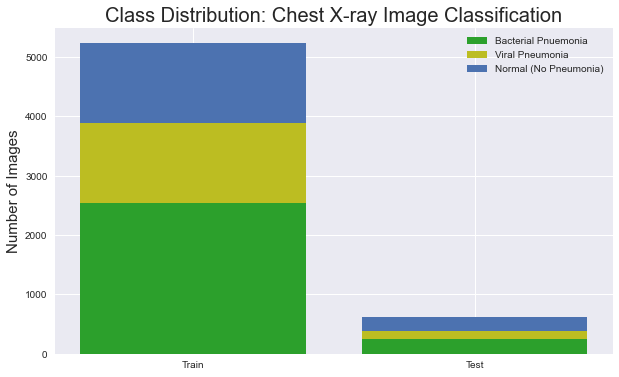

In [7]:
cnn.show_class_distribution()

In [8]:
len(cnn.df_[cnn.df_['label']!='normal'])

4273

In [9]:
cnn.binary_train_images.shape

(5232, 224, 224, 1)

In [10]:
cnn.binary_train_labels.shape

(5232,)

<img src="img/grayscale.png" width="600" height="100" />

Text(0.5, 0.98, 'Distribution of Gray Scale Sums')

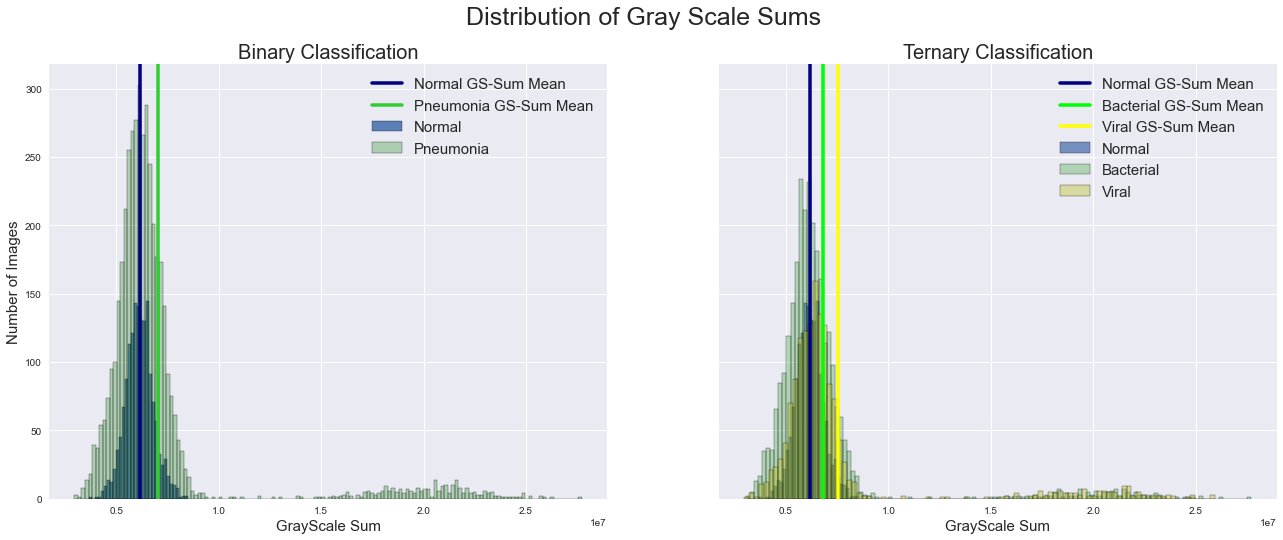

In [37]:
cnn.grayscale_sum_dist()

In [ ]:
cnn.dark_vs_light(1)

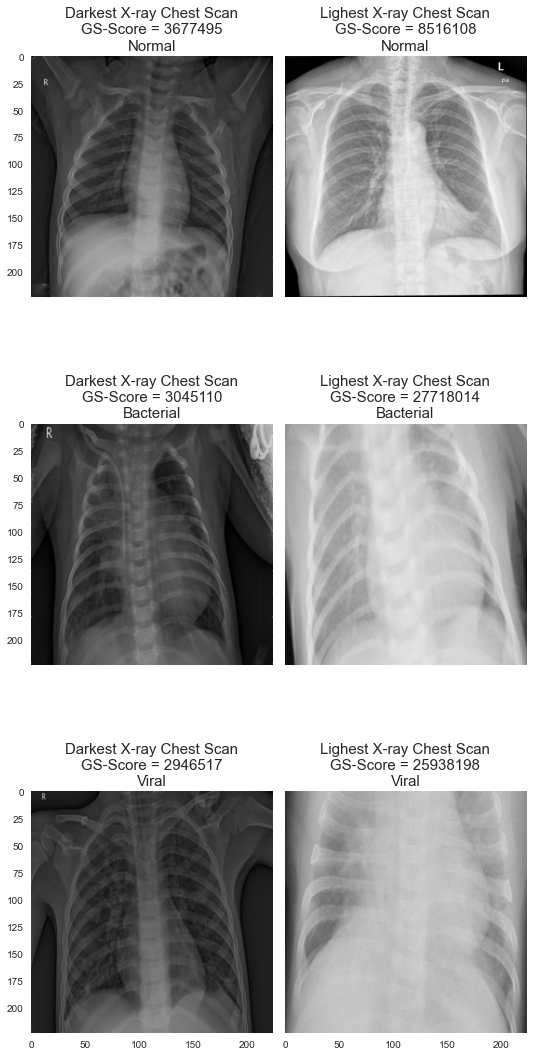

In [151]:
cnn.dark_vs_light(2)

## Network Time!

#### Parameters of consideration:
* Learning Rate
* Activation Function
* Number of Layers
    * Layer type
    * Filter size
* Batch Normalization
* Batch Size
* Epoch Size
* 

## Conclusions & Next Steps





## Sources